In [4]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, avg_abundance, total_stellar_mass, gasmetals_profile


In [5]:
with h5py.File('redshift_ids.hdf5', 'r') as f:
    z1_5_ids = f['z1.5_ids'][:]
    z3_ids = f['z3_ids'][:]
    
with h5py.File('galaxy_population_data_'+str(2)+'.hdf5', 'r') as f:
    z2_ids = f['ids'][:]
#     median_age = f['median_age'][:]
#     halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
#     halflight_radius_U = f['halflight_radius_U'][:]
#     halflight_radius_V = f['halflight_radius_V'][:]
#     halflight_radius_I = f['halflight_radius_I'][:]
#     newbin_current_SFR = f['newbin_current_SFR'][:]
#     maximum_merger_ratio_30kpc_current_fraction = f['maximum_merger_ratio_30kpc_current_fraction'][:]
#     FeH_Re = f['FeH_Re'][:]
#     MgFe_Re = f['MgFe_Re'][:]
#     MgH_Re = f['MgH_Re'][:]
#     FeH_1kpc = f['FeH_1kpc'][:]
#     MgFe_1kpc = f['MgFe_1kpc'][:]
#     MgH_1kpc = f['MgH_1kpc'][:]

# [Fe/H]

median, unweighted

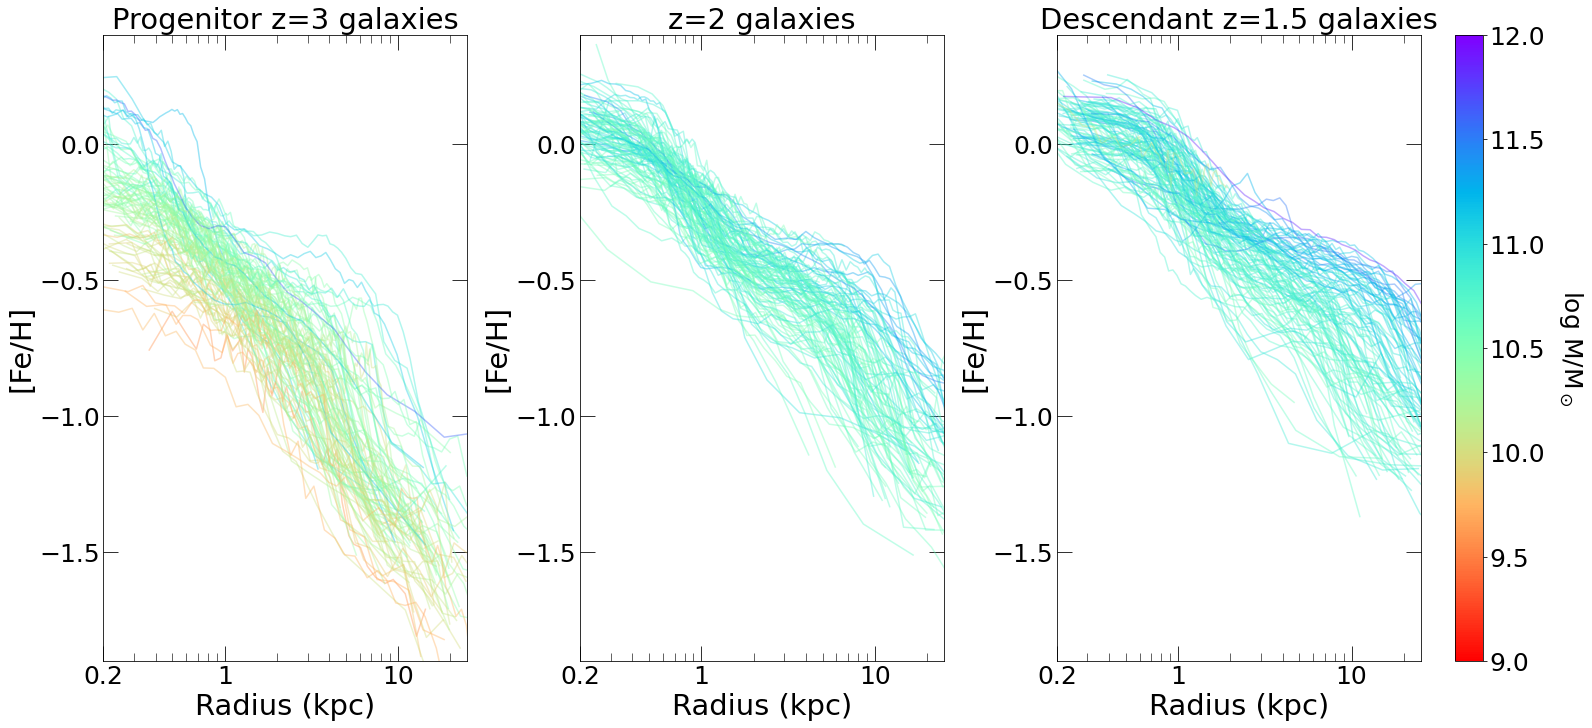

In [49]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(22, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 29
ftss = 25
# plt.subplots_adjust(left=0.02, right=0.9)

colormap = plt.get_cmap('rainbow_r')
norm = colors.Normalize(vmin=9.0, vmax=12.0)

# parents
redshift = 3
for id in np.random.choice(z3_ids, 100, replace=False):
    if id in [4519623, -1]:
        pass
    else:
        yy, logFeH, xx, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
        mass = total_stellar_mass(id=id, redshift=redshift)
        color = colormap(norm(mass))
        ax1.plot(xx[1:-2], yy[1:-2], color=color, alpha = 0.4)
ax1.set_title('Progenitor z=' + str(redshift) + ' galaxies', fontsize=fts) #
ax1.set_xlim(0.2, 25)
ax1.set_ylim(-1.9, 0.4)
ax1.set_xlabel("Radius (kpc)", fontsize=fts)
ax1.set_ylabel('[Fe/H]', fontsize=fts)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])

# z=2
redshift = 2
for id in np.random.choice(z2_ids, 100, replace=False):
    yy, logFeH, xx, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    mass = total_mass[z2_ids==id]
    color = colormap(norm(mass)).tolist()
    color = tuple(color[0][:])
    ax2.plot(xx[1:-2], yy[1:-2], color=color, alpha = 0.4)
ax2.set_title('z=' + str(redshift) + ' galaxies', fontsize=fts) #
ax2.set_xlim(0.2, 25)
ax2.set_ylim(-1.9, 0.4)
ax2.set_xlabel("Radius (kpc)", fontsize=fts)
ax2.set_ylabel('[Fe/H]', fontsize=fts)
ax2.set_xscale('log')
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax2.set_xticks([0.2, 1, 10], minor=False)
ax2.set_xticklabels(['0.2', '1', '10'])

# children
redshift = 1.5
for id in np.random.choice(z1_5_ids, 100, replace=False):
    yy, logFeH, xx, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    mass = total_stellar_mass(id=id, redshift=redshift)
    color = colormap(norm(mass))
    ax3.plot(xx[1:-2], yy[1:-2], color=color, alpha = 0.4)
ax3.set_title('Descendant z=' + str(redshift) + ' galaxies', fontsize=fts) #
ax3.set_xlim(0.2, 25)
ax3.set_ylim(-1.9, 0.4)
ax3.set_xlabel("Radius (kpc)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.set_xscale('log')
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax3.set_xticks([0.2, 1, 10], minor=False)
ax3.set_xticklabels(['0.2', '1', '10'])

# ax4 = plt.subplot(gs[3][0])
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
cbar = f.colorbar(sm, ax=axes.ravel().tolist(), aspect=50)
cbar.set_label('log M/M$_\odot$', fontsize=ftss, rotation=270, labelpad=40)
cbar.ax.tick_params(labelsize=ftss)

# plt.tight_layout()

plt.savefig('FIGURES/relatives.png', dpi=400, bbox_inches='tight')

gas abundance

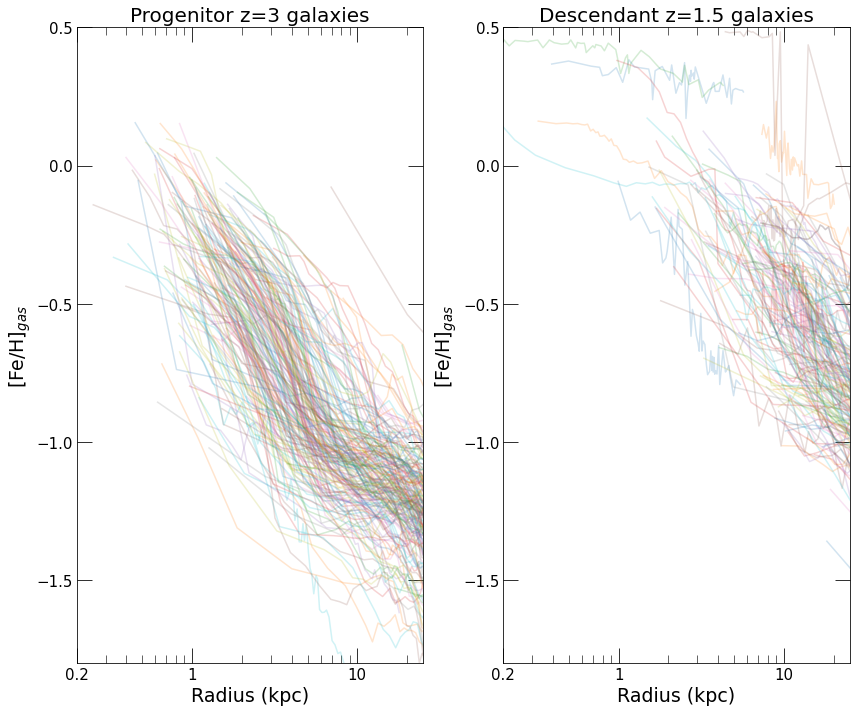

In [7]:
#metallicity profiles
f, (ax1, ax2) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(12, 10))
f.set_facecolor('w')
n_bins = 50

# parents
redshift = 3
for id in np.random.choice(z3_ids, 200, replace=False):
    if id in [4519623, -1]:
        pass
    else:
        yy, logFeH, xx, R = gasmetals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
        if len(yy) == 1:
            pass
        else:
            ax1.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
ax1.set_title('Progenitor z=' + str(redshift) + ' galaxies', fontsize=20) #
ax1.set_xlim(0.2, 25)
ax1.set_ylim(-1.8, 0.5)
ax1.set_xlabel("Radius (kpc)", fontsize=19)
ax1.set_ylabel('[Fe/H]$_{gas}$', fontsize=19)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])

# children
redshift = 1.5
for id in np.random.choice(z1_5_ids, 200, replace=False):
    yy, logFeH, xx, R = gasmetals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    if len(yy) == 1:
        pass
    else:
        ax2.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
ax2.set_title('Descendant z=' + str(redshift) + ' galaxies', fontsize=20) #
ax2.set_xlim(0.2, 25)
ax2.set_ylim(-1.8, 0.5)
ax2.set_xlabel("Radius (kpc)", fontsize=19)
ax2.set_ylabel('[Fe/H]$_{gas}$', fontsize=19)
ax2.set_xscale('log')
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=15, bottom=True, top=True, left=True, right=True)
ax2.set_xticks([0.2, 1, 10], minor=False)
ax2.set_xticklabels(['0.2', '1', '10'])


f.tight_layout()